<a href="https://colab.research.google.com/github/durgaprasaddp72/Stock_market_sentiment_analysys/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder

In [2]:
feargreed=pd.read_csv('fear_greed_index.csv')
historical=pd.read_csv('historical_data.csv')

In [3]:
feargreed.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
feargreed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [5]:
historical.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [6]:
historical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [7]:
historical['date']=pd.to_datetime(historical['Timestamp'],unit='ms').dt.date

## selecting the wanted columns for analysys

In [8]:
historical=historical[['Coin',"Execution Price",'Size Tokens','Size USD','Side','Start Position',
                           'Direction','Closed PnL','Crossed','Fee','date']]


In [9]:
historical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Coin             211224 non-null  object 
 1   Execution Price  211224 non-null  float64
 2   Size Tokens      211224 non-null  float64
 3   Size USD         211224 non-null  float64
 4   Side             211224 non-null  object 
 5   Start Position   211224 non-null  float64
 6   Direction        211224 non-null  object 
 7   Closed PnL       211224 non-null  float64
 8   Crossed          211224 non-null  bool   
 9   Fee              211224 non-null  float64
 10  date             211224 non-null  object 
dtypes: bool(1), float64(6), object(4)
memory usage: 16.3+ MB


I chose columns capturing key trade attributes and profitability-'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Start Position', 'Direction', 'Closed PnL', 'Crossed', 'Fee', and 'date'-to focus the analysis on meaningful factors influencing trade behavior, while excluding unique identifiers and metadata like 'Account', 'Order ID', 'Transaction Hash', 'Timestamp', and 'Timestamp IST' which are irrelevant for understanding trade performance and market sentiment.

In [10]:
feargreed=feargreed.drop(['timestamp','value'],axis=1)
feargreed.head()

,classification,date
0,Fear,2018-02-01
1,Extreme Fear,2018-02-02
2,Fear,2018-02-03
3,Extreme Fear,2018-02-04
4,Extreme Fear,2018-02-05


In [11]:
historical.dtypes

,0
Coin,object
Execution Price,float64
Size Tokens,float64
Size USD,float64
Side,object
Start Position,float64
Direction,object
Closed PnL,float64
Crossed,bool
Fee,float64


In [12]:
feargreed.dtypes

,0
classification,object
date,object


convert the date columns type from object to date in both datasets

In [13]:
historical.loc[:,'date']=pd.to_datetime(historical['date']).dt.date
feargreed.loc[:,'date']=pd.to_datetime(feargreed['date']).dt.date

In [14]:
historical.shape

(211224, 11)

In [15]:
feargreed.shape

(2644, 2)

## merge the datasets on common column date using inner join for joining the common rows

In [16]:
df=pd.merge(historical,feargreed,on='date',how='inner')
df.head()

,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Crossed,Fee,date,classification
0,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,True,0.345404,2024-10-27,Greed
1,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,True,0.005600,2024-10-27,Greed
2,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0,True,0.050431,2024-10-27,Greed
3,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0,True,0.050043,2024-10-27,Greed
4,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0,True,0.003055,2024-10-27,Greed


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184263 entries, 0 to 184262
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Coin             184263 non-null  object 
 1   Execution Price  184263 non-null  float64
 2   Size Tokens      184263 non-null  float64
 3   Size USD         184263 non-null  float64
 4   Side             184263 non-null  object 
 5   Start Position   184263 non-null  float64
 6   Direction        184263 non-null  object 
 7   Closed PnL       184263 non-null  float64
 8   Crossed          184263 non-null  bool   
 9   Fee              184263 non-null  float64
 10  date             184263 non-null  object 
 11  classification   184263 non-null  object 
dtypes: bool(1), float64(6), object(5)
memory usage: 15.6+ MB


## getting statistical properties of the columns of merged dataset

In [18]:
df.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Fee
count,184263.000000,1.842630e+05,1.842630e+05,1.842630e+05,184263.000000,184263.000000
mean,9624.179560,4.588772e+03,4.780733e+03,1.634172e+04,55.492690,1.003504
std,27106.266497,1.105144e+05,2.690428e+04,3.938825e+05,937.857954,5.152379
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,-1.175712
25%,5.024600,3.650000e+00,1.875300e+02,-1.189096e+02,0.000000,0.015936
50%,17.770000,3.400000e+01,5.927400e+02,3.701700e+02,0.000000,0.087527
75%,28.920000,1.803000e+02,2.032705e+03,1.264308e+04,6.602400,0.387603
max,109004.000000,1.582244e+07,3.509753e+06,3.050948e+07,135329.090100,539.021456


In [19]:
df.isnull().sum()

,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Start Position,0
Direction,0
Closed PnL,0
Crossed,0
Fee,0


## EDA Exploratory Data Analysys

In [20]:
df['profitable']=df['Closed PnL']>0# calculate the profit by apply the condition to closedpnl column

## creating aggregate measures to analyze the sentiment among different metrics

In [21]:
summary=df.groupby('classification').agg(
    avg_pnl=('Closed PnL','mean'),
    meadian_pnl=('Closed PnL','median'),
    win_rate=('profitable','mean'),
    trade_count=('Closed PnL','count')
).reset_index()#reset index after apply the groupby

##  winrate by sentiment

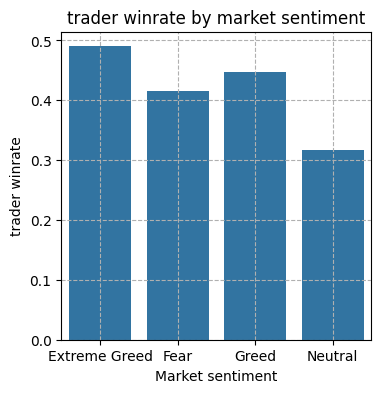

In [22]:
plt.figure(figsize=(4,4))
sns.barplot(data=summary,x='classification',y='win_rate')
plt.title('trader winrate by market sentiment')
plt.ylabel("trader winrate")
plt.xlabel('Market sentiment')
plt.grid(True,linestyle="--")
plt.savefig('win_rate.png',dpi=300,bbox_inches='tight')
plt.show()

## average pnl by sentiment

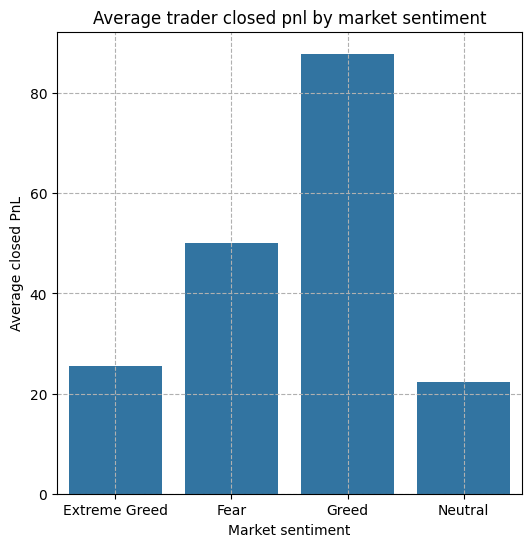

In [23]:
plt.figure(figsize=(6,6))
sns.barplot(data=summary,x='classification',y='avg_pnl')
plt.title('Average trader closed pnl by market sentiment')
plt.ylabel("Average closed PnL")
plt.xlabel('Market sentiment')
plt.grid(True,linestyle="--")
plt.savefig('average_pnl.png',dpi=300,bbox_inches='tight')
plt.show()

1.Greed sentiment gives the best profits, even with a slightly lower win rate, suggesting fewer but more profitable traders.


2.Extreme greed has the highest win rate, but not the highest profit, possibly due to smaller trade sizes or more cautious behavior.


3.Neutral market prform worst in both profit and win rate, likely indicating uncertainty or low confidence among traders.

## analyze the size_USD column behaviour on sentiment

In [24]:
summary=df.groupby('classification').agg(
    avg_trade_size=('Size USD','mean'),
    median_trade_size=('Size USD','median'),
    trade_count=("Size USD",'count')
).reset_index()

In [25]:
summary

,classification,avg_trade_size,median_trade_size,trade_count
0,Extreme Greed,5660.265764,1148.635,6962
1,Fear,5259.977837,605.070,133871
2,Greed,3182.883845,499.940,36289
3,Neutral,3058.848110,554.160,7141


## average and median tradesize by sentiment

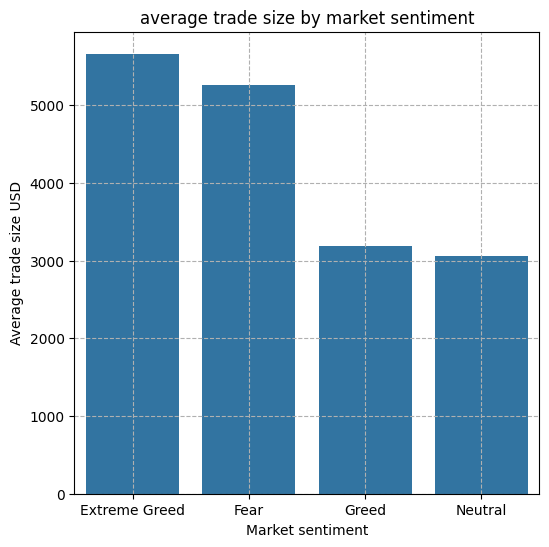

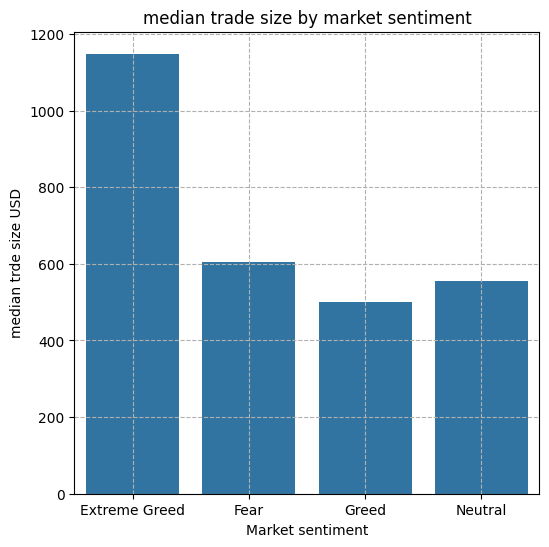

In [26]:
plt.figure(figsize=(6,6))
sns.barplot(data=summary,x='classification',y='avg_trade_size')
plt.title("average trade size by market sentiment")
plt.xlabel('Market sentiment')
plt.ylabel('Average trade size USD')   # average trade size by sentiment
plt.grid(True,linestyle='--')
plt.savefig('avg_tradesize.png')
plt.show()

plt.figure(figsize=(6,6))
sns.barplot(data=summary,x='classification',y='median_trade_size')
plt.title("median trade size by market sentiment")#median trade size by sentiment
plt.xlabel('Market sentiment')
plt.ylabel('median trde size USD')
plt.grid(True,linestyle='--')
plt.savefig('median_tradesize.png')
plt.show()





1.Extreme greed shows both high average and median trade sizes,indicating a general tendancy toward larger trades by most traders.


2.Fear shows a high average but lower median. This gap implies that a few large trades are inflating the average, while the majority of traders reamin relatively small.


3.In contrasr, Greed and Neutral sentiments are associated with smaller trade sizes, both on average and median.
This reflects a more cautious or balanced trading approch, likely due to reduced market volatility ot overconfidence leading to smaller, feaquent trades.

## side column behaviour on sentimen

In [27]:
summary=df.groupby(['classification','Side']).agg(
    avg_trade_size=('Size USD','mean'),
    median_trade_size=('Size USD','median'),
    win_rate=('profitable','mean'),
    trade_count=('Size USD','count')
).reset_index()

## plot winrate by sentiment and trade side

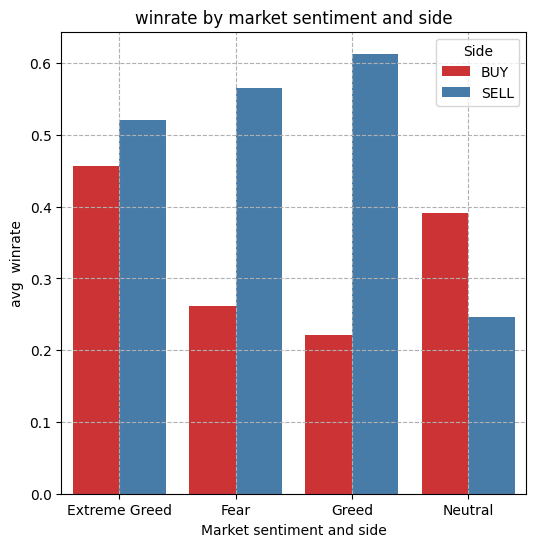

In [28]:
plt.figure(figsize=(6,6))
sns.barplot(data=summary,x='classification',y='win_rate',hue='Side',palette='Set1')
plt.title("winrate by market sentiment and side")#winrate by sentiment and side
plt.xlabel('Market sentiment and side')
plt.ylabel('avg  winrate')
plt.grid(True,linestyle='--')
plt.savefig('avg_profit_by_sentiment&side.png')
plt.show()

## average trade size by sentiment and trade side

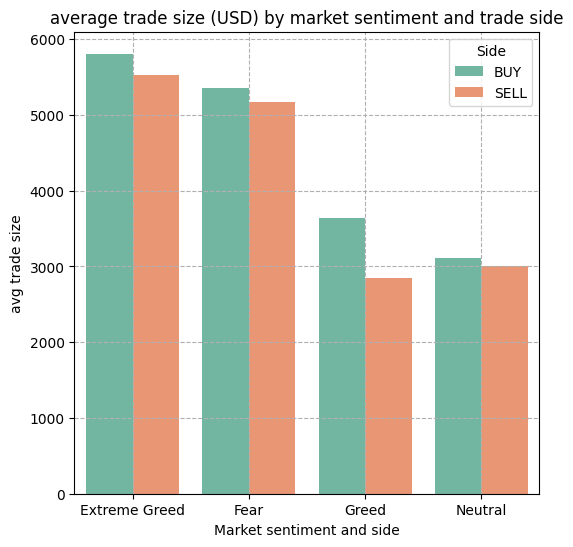

In [29]:
plt.figure(figsize=(6,6))
sns.barplot(data=summary,x='classification',y='avg_trade_size',hue='Side',palette='Set2')
plt.title("average trade size (USD) by market sentiment and trade side")#winrate by sentiment and side
plt.xlabel('Market sentiment and side')
plt.ylabel('avg trade size')
plt.grid(True,linestyle='--')
plt.savefig('avg_trade(size)_by_sentiment&side.png')
plt.show()

1.SELL traders outperform BUY traders in emotional market conditionns like Fear and Greed, showing higher win rates.


2.BUY traders perform better in neutral markets, where sentiment is stable.


3.Overall, SELL strategy is more successful during volatile sentiments, while BUY works better in calm, neutral conditions.

In [30]:
df['Coin'].unique()

array(['@107', 'AAVE', 'DYDX', 'AIXBT', 'GMX', 'EIGEN', 'HYPE', 'SOL',
       'SUI', 'DOGE', 'ETH', 'kPEPE', 'TRUMP', 'ONDO', 'ENA', 'LINK',
       'XRP', 'S', 'BNB', 'BERA', 'WIF', 'LAYER', 'MKR', 'KAITO', 'IP',
       'JUP', 'USUAL', 'ADA', 'BTC', 'PURR/USDC', 'ZRO', '@7', '@19',
       '@21', '@44', '@48', '@11', '@15', '@46', '@61', '@28', '@45',
       '@9', '@41', '@38', 'kSHIB', 'GRASS', 'TAO', 'AVAX', '@2', '@6',
       '@8', '@10', '@12', '@16', '@17', '@35', '@26', '@24', '@32',
       '@29', '@31', '@33', '@34', '@36', '@37', '@47', '@53', '@74',
       'RUNE', 'CANTO', 'NTRN', 'BLUR', 'ZETA', 'MINA', 'MANTA', 'RNDR',
       'WLD', 'kBONK', 'ALT', 'INJ', 'STG', 'ZEN', 'MAVIA', 'PIXEL',
       'ILV', 'FET', 'STRK', 'CAKE', 'STX', 'ACE', 'PENDLE', 'AR', 'XAI',
       'APE', 'MEME', 'NEAR', 'SEI', 'FTM', 'MYRO', 'BIGTIME', 'IMX',
       'BADGER', 'POLYX', 'OP', 'TNSR', 'MAV', 'TIA', 'MERL', 'TON',
       'PURR', 'ME', 'CRV', 'BRETT', 'CHILLGUY', 'MOODENG', 'VIRTUAL',
       'CO

In [31]:
summary=df.groupby(['Coin','classification']).agg(
    avg_pnl=('Closed PnL','mean'),
    median_pnl=('Closed PnL','median'),
    avg_trade_size=('Size USD','mean'),
    trade_count=('Closed PnL','count')

).reset_index()

## heatmap of avg_pnl for top coins and sentiment

In [32]:
summary.head()

,Coin,classification,avg_pnl,median_pnl,avg_trade_size,trade_count
0,@1,Fear,0.119853,0.000000,66.085556,9
1,@1,Greed,19.826702,0.000000,122.676800,25
2,@10,Neutral,-0.015871,0.000000,9.327500,4
3,@100,Greed,6.906785,3.251495,10.667500,4
4,@103,Fear,0.000000,0.000000,0.000000,1


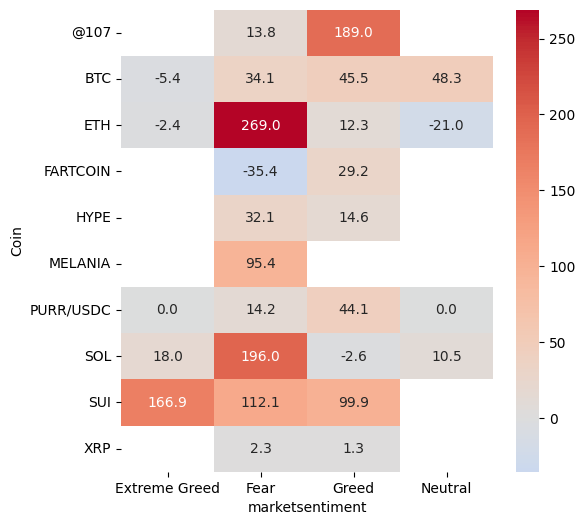

In [33]:
top_coins=df['Coin'].value_counts().nlargest(10).index.tolist()
top_coins=summary[summary['Coin'].isin(top_coins)]

pivot=top_coins.pivot(index='Coin',columns='classification',values='avg_pnl')
plt.figure(figsize=(6,6))
sns.heatmap(pivot,annot=True,fmt='.1f',cmap='coolwarm',center=0)
plt.ylabel('Coin')
plt.xlabel('marketsentiment')
plt.savefig('avg_pnl_coin.png',dpi=300,bbox_inches='tight')
plt.show()


1.Coins like ETH, SUI, and SOL are more profitable under bearish conditions.


2.SUI is consistently profitable, making it a potentially strong coin regardless of market sentiment.

3.Market sentiment strongly influences PnL, so trading strategies should consider corrent sentiment.

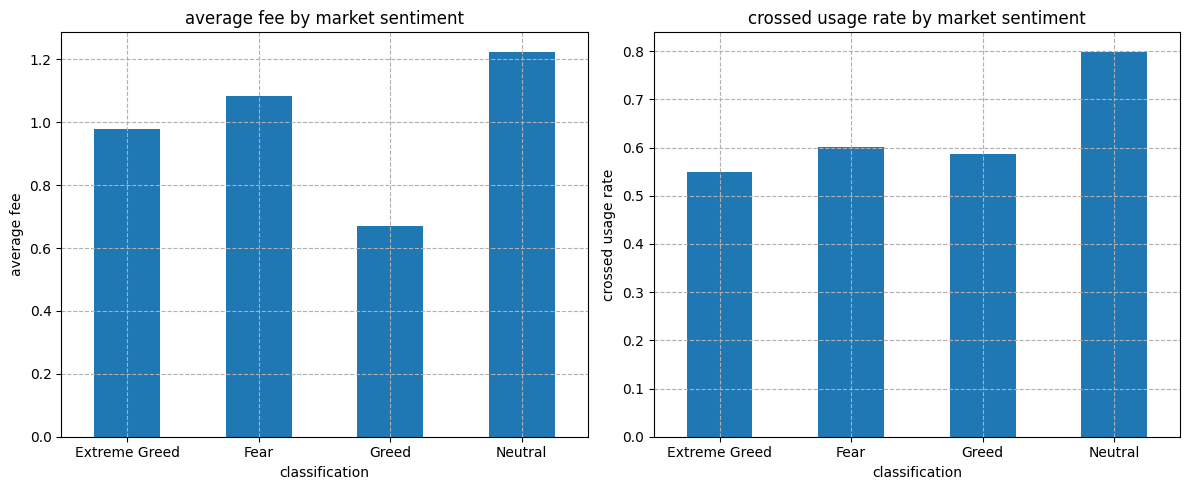

In [38]:
# calculate average fee by sentiment
avg_fee_by_sentiment=df.groupby('classification')['Fee'].mean()
#calculate crossed usage rate by sentiment
crossed_usage_by_sentiment=df.groupby('classification')['Crossed'].mean()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
avg_fee_by_sentiment.plot(kind='bar')
plt.title('average fee by market sentiment')
plt.ylabel('average fee')
plt.grid(True,linestyle='--')
plt.xticks(rotation=0)


plt.subplot(1,2,2)
crossed_usage_by_sentiment.plot(kind='bar')
plt.title("crossed usage rate by market sentiment")
plt.ylabel('crossed usage rate')
plt.grid(True,linestyle='--')
plt.xticks(rotation=0)

plt.tight_layout()
plt.savefig('average_fee_crossed.png',dpi=300,bbox_inches='tight')
plt.show()



1.Greed periods may offer more stable, cost-efficient trading environments.

2.High fees in Neutral/Fear imply you should monitor trading cost efficiency, especially in uncertain or bearish markets.

In [36]:
df.columns

Index(['Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Start Position', 'Direction', 'Closed PnL', 'Crossed', 'Fee', 'date',
       'classification', 'profitable'],
      dtype='object')

In [39]:
crossed_usage_by_sentiment=df.groupby('classification')['Crossed'].mean()
print('Crossed usage rate:')
print(crossed_usage_by_sentiment)


Crossed usage rate:
classification
Extreme Greed    0.550129
Fear             0.600675
Greed            0.587561
Neutral          0.799048
Name: Crossed, dtype: float64


1.The highest crossed usage is during Neutral sentiment (~80%), indicating traders take the most risk or use cross margin more in neutral markets.

2.Crossed usage is lowest in Extreme Greed (~55%), suggesting slightly more conservative or isolated margin usage during very bullish periods.

3.Fairly similar rates for Fear and Greed (~60%), showing consistent risk-taking regardless of market optimism or pessimism.

In [42]:
from scipy.stats import f_oneway,kruskal,chi2_contingency
#extract pnl and trade size groups for each classification
groups_pnl=[df[df['classification']==c]['Closed PnL']
            for c in df['classification'].unique()]

groups_size=[df[df['classification']==c]['Size USD']
            for c in df['classification'].unique()]

In [44]:
# 1. ANOVA test for net_pnl across all 4 sentiments
anova_stat_pnl, anova_pval_pnl = f_oneway(*groups_pnl)
print(f"ANOVA for closed_pnl: stat={anova_stat_pnl:.3f}, p-value={anova_pval_pnl:.3f}")

# If data is not normally distributed, use Kruskal-Wallis (non-parametric)
kruskal_stat_pnl, kruskal_pval_pnl = kruskal(*groups_pnl)
print(f"Kruskal-Wallis for closed_pnl: stat={kruskal_stat_pnl:.3f}, p-value={kruskal_pval_pnl:.3f}")
print('-----------------')
# 2. ANOVA test for size_usd
anova_stat_size, anova_pval_size = f_oneway(*groups_size)
print(f"ANOVA for size_usd: stat={anova_stat_size:.3f}, p-value={anova_pval_size:.3f}")

# Kruskal-Wallis for size_usd
kruskal_stat_size, kruskal_pval_size = kruskal(*groups_size)
print(f"Kruskal-Wallis for size_usd: stat={kruskal_stat_size:.3f}, p-value={kruskal_pval_size:.3f}")
print('----------------')
# 3. Chi-Squared test for direction vs classification
contingency_table = pd.crosstab(df['Direction'], df['classification'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared test for direction vs classification: chi2={chi2:.3f}, p-value={p:.3f}")
print()
print("Contingency Table:")
print()
print(contingency_table)

ANOVA for closed_pnl: stat=21.330, p-value=0.000
Kruskal-Wallis for closed_pnl: stat=386.548, p-value=0.000
-----------------
ANOVA for size_usd: stat=69.132, p-value=0.000
Kruskal-Wallis for size_usd: stat=1090.696, p-value=0.000
----------------
Chi-squared test for direction vs classification: chi2=27076.311, p-value=0.000

Contingency Table:

classification        Extreme Greed   Fear  Greed  Neutral
Direction                                                 
Auto-Deleveraging                 0      0      0        8
Buy                              88   7977   5806      786
Close Long                     2389  36555   5105      886
Close Short                    1931  20232   4129     1799
Long > Short                     13     36      5        0
Open Long                      1339  37828   5479      918
Open Short                     1114  23472   5886     2389
Sell                             75   7687   9833      295
Settlement                        0      1      0        0
Sh

1.Trader performance (closed PnL) and trade sizes vary significantly across market sentiment states (Fear, Greed, Extreme Greed, Neutral), as shown by highly significant ANOVA and Kruskal-Wallis tests (p < 0.001).

2.There is a strong association between trade direction and market sentiment (Chi-squared test p < 0.001), indicating traders adjust their strategies depending on the sentiment.

3.For example, during Fear, traders tend to open and close long positions heavily, while in Neutral sentiment, opening and closing short positions dominate.

4.This suggests market sentiment strongly influences trading behavior and outcomes, highlighting opportunities to tailor strategies based on prevailing sentiment.

In [45]:
prop_table = contingency_table.div(contingency_table.sum(axis=0), axis=1) * 100
print(prop_table.round(2))

classification        Extreme Greed   Fear  Greed  Neutral
Direction                                                 
Auto-Deleveraging              0.00   0.00   0.00     0.11
Buy                            1.26   5.96  16.00    11.01
Close Long                    34.31  27.31  14.07    12.41
Close Short                   27.74  15.11  11.38    25.19
Long > Short                   0.19   0.03   0.01     0.00
Open Long                     19.23  28.26  15.10    12.86
Open Short                    16.00  17.53  16.22    33.45
Sell                           1.08   5.74  27.10     4.13
Settlement                     0.00   0.00   0.00     0.00
Short > Long                   0.19   0.03   0.02     0.03
Spot Dust Conversion           0.00   0.03   0.11     0.81


In [41]:
df.columns

Index(['Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Start Position', 'Direction', 'Closed PnL', 'Crossed', 'Fee', 'date',
       'classification', 'profitable'],
      dtype='object')

1.Extreme Greed:
Mostly closing longs (34%) and closing shorts (28%), with opening longs (19%) and opening shorts (16%) still active-likely profit-taking and position management.

2.Fear:
High activity in opening longs (28%) and closing longs (27%), reflecting traders reacting to fear by possibly entering or exiting long positions rapidly.

3.Greed:
Heavy on selling (27%) and buying (16%), showing active trade both ways, plus balanced open long/short trades (~15-16%).


4.Neutral:
Dominated by opening shorts (33%) and closing shorts (25%), indicating more bearish or hedging activity.

## conclusion

## Market Sentiment Strongly Influences Performance



* Greed sentiment produces the highest overall profits, despite slightly lower win rates. This suggests that fewer but more lucrative trades dominate, pointing to a high-reward environment.  

*  Extreme Greed yields the highest win rates, yet with lower overall profits—likely due to profit-taking and more cautious trade sizing.
* Neutral sentiment is the least favorable, showing the lowest profitability and win rates. This indicates trader uncertainty and ineffective strategies under unclear market direction.




##  2. Trade Size Patterns Reveal Hidden Behaviors



*   Extreme Greed sees both high average and median trade sizes, showing widespread confidence and aggressive positioning.

*   Fear sentiment displays a high average but low median trade size, revealing that while a few traders take large positions, most remain conservative—indicating mixed confidence.
*  Greed and Neutral are characterized by smaller, more frequent trades, reflecting either cautious risk management or low market volatility.




## 3. Trade Direction Adapts to Sentiment



* A strong association exists between sentiment and trade direction (Chi-squared test, p < 0.001).

*   SELL trades outperform BUY trades during emotional conditions (Fear and Greed), suggesting traders capitalize better on downside volatility.
*   BUY trades are more successful in Neutral markets, where stability favors long positions.



## 4. Coin Performance and Strategy Optimization



* Coins like SUI, ETH, and SOL perform better under bearish conditions.

* SUI is consistently profitable across all sentiments—making it a strong candidate for sentiment-independent strategies.

* These asset-specific patterns suggest the importance of pairing asset selection with sentiment-based timing.



## 5. Risk Behavior and Margin Usage



*   Cross margin usage peaks during Neutral sentiment (~80%), indicating higher risk-taking despite low performance-an inefficiency traders should address.
* It drops during Extreme Greed (~55%), showing more isolated, cautious risk management during overly bullish phases.

* Trading fees are highest in Neutral and Fear, underlining the need to monitor cost-efficiency in less favorable market conditions.



## Strategic Insight

By aligning trading decisions with prevailing market sentiment, traders can significantly improve both profitability and risk control. The data reveals clear behavioral patterns and strategy shifts that correlate with emotional market states-providing a roadmap for:

* Adjusting trade direction and position sizing based on sentiment
* Choosing optimal trading periods and assets (e.g., focusing on SUI in any condition)
* Monitoring margin usage and fees for cost-effective execution
